Metrična in deljena metrična dimenzija za drevesa

In [1]:
def metric_dimension_tree(G):
    
    n = G.num_verts()
    
    if n == 1:
        return 1
    
    # preverimo ali je drevo tudi pot, takrat je metrična dimenzija enaka 1
    ones = 0
    twos = 0
    degrees = G.degree()
    for i in degrees:
        if i == 1:
            ones += 1
        if i == 2:
            twos += 1
    if [ones, twos] == [2, n-2]:  # pot ima natanko dve vozlišči stopnje 1, ostala so stopnje 2
        return 1
    
    D = G.distance_matrix()  # matrika razdalj med vsakima dvema vozliščema
    
    # izkoristimo teorijo: za sode premere grafa je podana eksplicitna izražava
    diameter = D.numpy().max()   # premer grafa je maksimalna razdalja med vozliščema v grafu
    if D%2 == 0:
        print(diameter)
        return 4*(2*n - diameter - 2)/(diameter*(diameter + 2))
    
    # od tu tako kot pri standardnem programu, le da dodamo še eno omejitev
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.add_constraint(sum(x[w] for w in range(n)) >= 4*(2*n - diameter - 2)/(diameter*(diameter + 2)))
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

In [2]:
def metric_dimension_tree2(G):
    
    n = G.num_verts()
    
    if n == 1:
        return 1
    
    # preverimo ali je drevo tudi pot, takrat je metrična dimenzija enaka 1
    ones = 0
    twos = 0
    degrees = G.degree()
    for i in degrees:
        if i == 1:
            ones += 1
        if i == 2:
            twos += 1
    if [ones, twos] == [2, n-2]:  # pot ima natanko dve vozlišči stopnje 1, ostala so stopnje 2
        return 1
    
    D = G.distance_matrix()  # matrika razdalj med vsakima dvema vozliščema
    
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

In [3]:
def fractional_metric_dimension_tree(G):
    n = G.num_verts()
    
    # preverimo ali je drevo tudi pot, takrat je metrična dimenzija enaka 1
    ones = 0
    twos = 0
    degrees = G.degree()
    for i in degrees:
        if i == 1:
            ones += 1
        if i == 2:
            twos += 1
    if [ones, twos] == [2, n-2]:  # pot ima natanko dve vozlišči stopnje 1, ostala so stopnje 2
        return 1
    
    # od tu napej tako, kot v standardnem programu
    D = G.distance_matrix()
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(real=True, nonnegative=True)
    p.set_max(x,1)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

Metrična in deljena metrična dimenzija za splošne grafe

In [4]:
def metric_dimension(G):
    n = G.num_verts()
    D = G.distance_matrix()
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

In [5]:
def fractional_metric_dimension(G):
    n = G.num_verts()
    D = G.distance_matrix()
    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(real=True, nonnegative=True)
    p.set_max(x,1)
    for u, v in Combinations(range(n), 2):
        p.add_constraint(sum(x[w] for w in range(n)
                             if D[u, w] != D[v, w]) >= 1)
    p.set_objective(sum(x[w] for w in range(n)))
    return p.solve()

Primeri

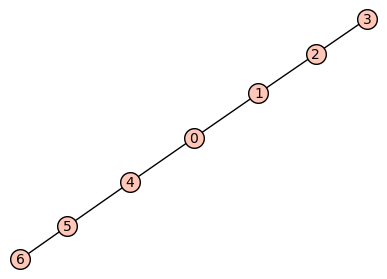

None
1.0
1
1.0
1
-----


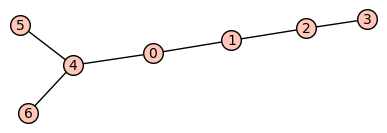

None
2.0
2.0
1.5
1.5
-----


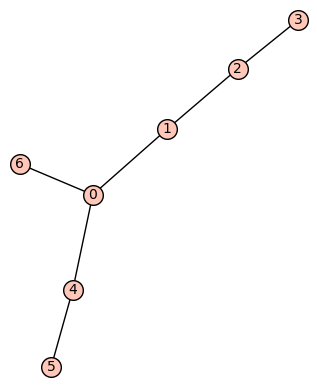

None
2.0
2.0
1.5
1.5
-----


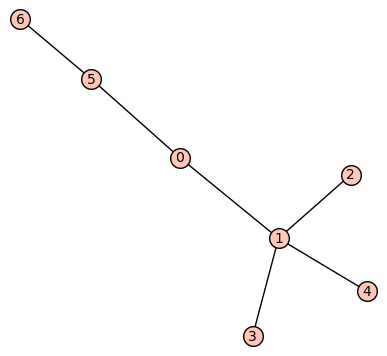

None
3.0
3.0
2.0


2.0
-----


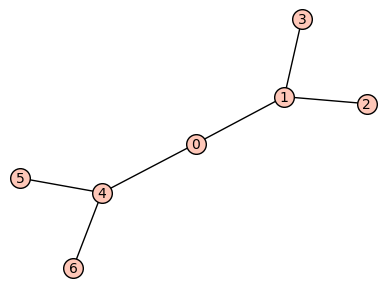

None
2.0
2.0
2.0
2.0
-----


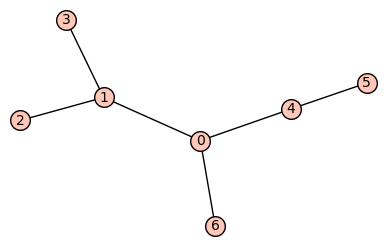

None
2.0
2.0
2.0
2.0
-----


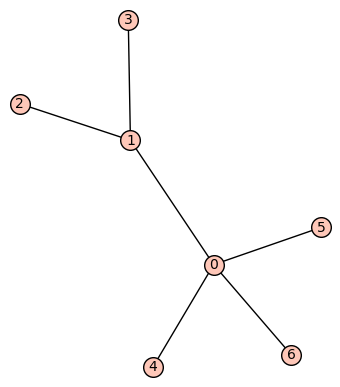

None
3.0
3.0
2.5
2.5
-----


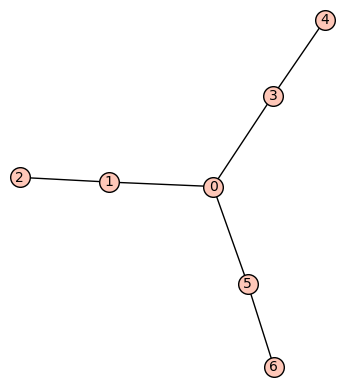

None
2.0
2.0
1.5
1.5
-----


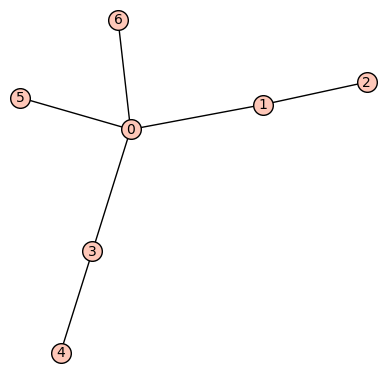

None
3.0
3.0
2.0
2.0
-----


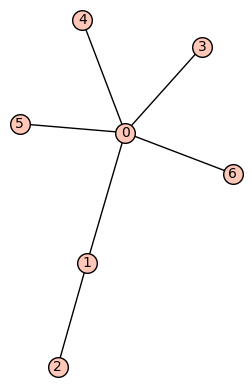

None
4.0
4.0
2.5
2.5
-----


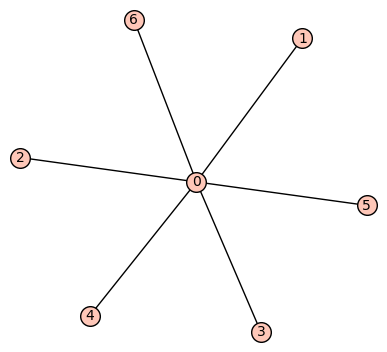

None
5.0
5.0
3.0
3.0
-----


In [7]:
# zgornje programe preiskusimo na vseh drevesih s 7 vozlišči
trees = graphs.trees(7)
for g in trees:
    print(g.show())
    print(metric_dimension(g))
    print(metric_dimension_tree(g))
    print(fractional_metric_dimension(g))
    print(fractional_metric_dimension_tree(g))
    print('-----')

In [8]:
G = graphs.RandomTree(83)

In [9]:
metric_dimension_tree(G)

13.0

In [10]:
metric_dimension(G

13.0

In [11]:
fractional_metric_dimension(G)

13.0

In [12]:
fractional_metric_dimension_tree(G)

13.0

Merjenje časovne zahtevnosti

In [8]:
# spodnjih pet zank je v pomoč pri merjenju časovne zahtevnosti algoritmov na manjših drevesih

def zanka_md(gen):
    st_grafov = 0
    for g in gen:
        st_grafov = st_grafov + 1
        metric_dimension(g)
    return st_grafov

generatorji = [graphs.trees(11)]

for gen in generatorji:
    %time st_grafov = zanka_md(gen)
    print(st_grafov)

CPU times: user 1.46 s, sys: 273 ms, total: 1.73 s
Wall time: 1.92 s
235


In [28]:
def zanka_tree_md(gen):
    st_grafov = 0
    for g in gen:
        st_grafov = st_grafov + 1
        metric_dimension_tree(g)
    return st_grafov

generatorji = [graphs.trees(10)]

for gen in generatorji:
    %time st_grafov = zanka_tree_md(gen)
    print(st_grafov)

CPU times: user 790 ms, sys: 12.5 ms, total: 802 ms
Wall time: 811 ms
106


In [18]:
def zanka_tree2_md(gen):
    st_grafov = 0
    for g in gen:
        st_grafov = st_grafov + 1
        metric_dimension_tree2(g)
    return st_grafov

generatorji = [graphs.trees(10)]

for gen in generatorji:
    %time st_grafov = zanka_tree2_md(gen)
    print(st_grafov)

CPU times: user 680 ms, sys: 44.6 ms, total: 724 ms
Wall time: 816 ms
106


In [6]:
def zanka_fmd(gen):
    st_grafov = 0
    for g in gen:
        st_grafov = st_grafov + 1
        fractional_metric_dimension(g)
    return st_grafov

generatorji = [graphs.trees(10)]

for gen in generatorji:
    %time st_grafov = zanka_fmd(gen)
    print(st_grafov)

CPU times: user 488 ms, sys: 6.64 ms, total: 495 ms
Wall time: 543 ms
106


In [7]:
def zanka_tree_fmd(gen):
    st_grafov = 0
    for g in gen:
        st_grafov = st_grafov + 1
        fractional_metric_dimension_tree(g)
    return st_grafov

generatorji = [graphs.trees(10)]

for gen in generatorji:
    %time st_grafov = zanka_tree_fmd(gen)
    print(st_grafov)

CPU times: user 468 ms, sys: 8.51 ms, total: 477 ms
Wall time: 507 ms
106


In [7]:
# spodnje zanke so v pomoč pri merjenju časovne zahtevnosti algoritmov na večjih drevesih

grafi = [graphs.RandomTree(20) for _ in range(1,6)] # 5 nakljucnih grafov na 20 vozliščih

def povprecje_md(grafi):
    for g in grafi:
        metric_dimension(g)
    return

def povprecje_md_tree(grafi):
    for g in grafi:
        metric_dimension_tree(g)
    return

def povprecje_md_tree2(grafi):
    for g in grafi:
        metric_dimension_tree2(g)
    return

def povprecje_fmd(grafi):
    for g in grafi:
        fractional_metric_dimension(g)
    return

def povprecje_fmd_tree(grafi):
    for g in grafi:
        fractional_metric_dimension_tree(g)
    return

%time povprecje_md(grafi)
%time povprecje_md_tree(grafi)
%time povprecje_md_tree2(grafi)
%time povprecje_fmd(grafi)
%time povprecje_fmd_tree(grafi)

CPU times: user 192 ms, sys: 10.7 ms, total: 203 ms
Wall time: 243 ms
CPU times: user 199 ms, sys: 4.83 ms, total: 204 ms
Wall time: 220 ms


CPU times: user 181 ms, sys: 15.2 ms, total: 196 ms
Wall time: 187 ms


CPU times: user 180 ms, sys: 20.6 ms, total: 201 ms
Wall time: 216 ms
CPU times: user 178 ms, sys: 0 ns, total: 178 ms
Wall time: 203 ms
